In [0]:
%tensorflow_version 2.x

In [0]:
import zipfile
zfile = zipfile.ZipFile("drive/My Drive/dog_cat.zip")
zfile.extractall("dataset")

In [9]:
import glob
import pandas as pd

catfn = glob.glob("dataset/train/cat.*")
catans = [0] * len(catfn)
dogfn = glob.glob("dataset/train/dog.*")
dogans = [1] * len(dogfn)
df = pd.DataFrame({
    "path":catfn + dogfn,
    "traget":catans + dogans
})
df

,path,traget
0,dataset/train/cat.1966.jpg,0
1,dataset/train/cat.9687.jpg,0
2,dataset/train/cat.8314.jpg,0
3,dataset/train/cat.5666.jpg,0
4,dataset/train/cat.670.jpg,0
...,...,...
24995,dataset/train/dog.10531.jpg,1
24996,dataset/train/dog.4312.jpg,1
24997,dataset/train/dog.7349.jpg,1
24998,dataset/train/dog.9791.jpg,1


(482, 476)


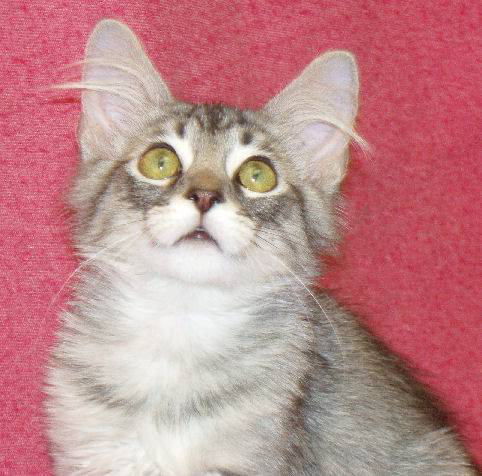

In [10]:
from tensorflow.keras.preprocessing.image import load_img
p = "dataset/train/cat.10544.jpg"
img = load_img(p)
print(img.size)
img


In [11]:
from tensorflow.keras.applications.vgg16 import VGG16
cnn = VGG16(include_top=False, input_shape=(224, 224, 3))
cnn.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
model = Sequential()

for l in cnn.layers:
  # trainable 一定要設, compile 前設定好
  l.trainable = False
  model.add(l)
# 自已的MLP
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(2, activation="softmax"))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      